<a href="https://colab.research.google.com/github/Avishagtams/1Work/blob/master/ML_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.8088 - loss: 0.5541 - val_accuracy: 0.8800 - val_loss: 0.3232
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 0.8983 - loss: 0.2853 - val_accuracy: 0.9023 - val_loss: 0.2764
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 0.9151 - loss: 0.2299 - val_accuracy: 0.9068 - val_loss: 0.2567
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 0.9271 - loss: 0.1995 - val_accuracy: 0.9080 - val_loss: 0.2546
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 0.9394 - loss: 0.1619 - val_accuracy: 0.9004 - val_loss: 0.2750
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.9452 - loss: 0.1477 - val_accuracy: 0.9137 - val_loss: 0.2499
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.9554 - loss: 0.1218 - val_accuracy: 0.9088 - val_loss: 0.2719
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 0.9623 -

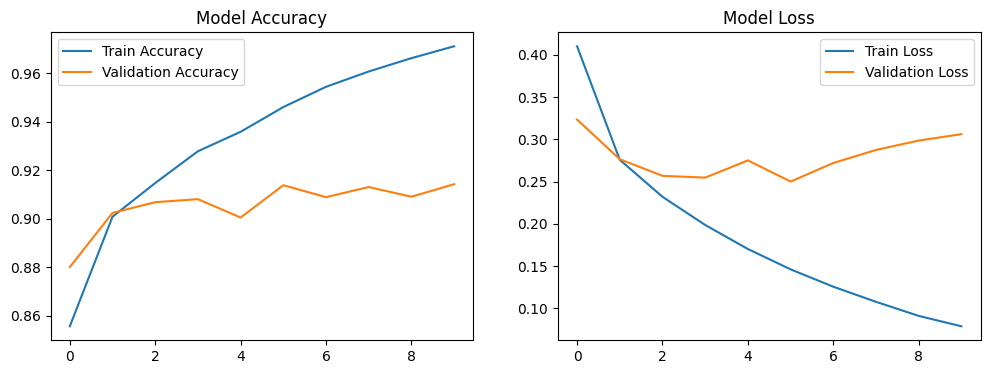

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# 1. טעינה וניקוי נתונים (Preprocessing - לפי Lecture 11)
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

# נרמול לטווח 0-1 (חשוב להתכנסות מהירה של הגרדיאנט)
train_images, test_images = train_images / 255.0, test_images / 255.0

# 2. בניית הארכיטקטורה (CNN - לפי Lecture 09)
model = models.Sequential([
    # הגדרת הקלט בצורה המודרנית כדי למנוע את האזהרה שקיבלת
    layers.Input(shape=(28, 28, 1)),

    # שכבה חבויה 1: קונבולוציה (חילוץ מאפיינים מקומיים)
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),

    # שכבה חבויה 2: Dense (קישור גלובלי בין המאפיינים)
    layers.Dense(128, activation='relu'),

    # שכבת פלט: Softmax (התפלגות הסתברותית ל-10 מחלקות)
    layers.Dense(10, activation='softmax')
])

# 3. הגדרת למידה (Optimizer & Loss - לפי Lecture 10)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# הצגת מבנה המודל (מה ששלחת לי קודם)
model.summary()

# 4. אימון המודל
# כאן הוספנו את ה-reshape כדי שהמחשב יבין שמדובר בתמונה עם ערוץ צבע אחד
history = model.fit(train_images.reshape(-1, 28, 28, 1), train_labels,
                    epochs=10,
                    validation_split=0.2)

# 5. הצגת גרפים של ביצועים (Performance Evaluation)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.legend()
plt.show()